In [0]:
import pandas as pd
prCancer = pd.read_csv("https://github.com/AVSirotkin/data_for_classes/raw/master/Prostate_Cancer.csv")

In [0]:
prCancer.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


Создадим тестовую и обучающую выборки.

In [0]:
import random
random.seed(3)
pc_test_ind = random.sample(range(len(prCancer)), k = int(len(prCancer)*0.3))
pc_test = prCancer.iloc[pc_test_ind]
pc_main = prCancer.iloc[[x for x in range(len(prCancer)) if not x in pc_test_ind]]

/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


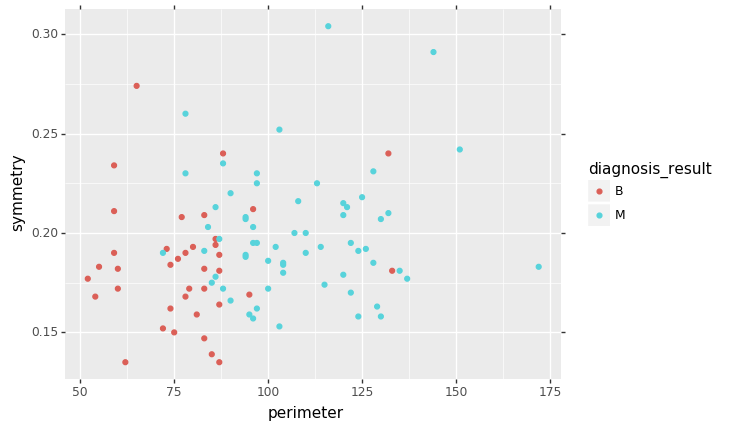

<ggplot: (-9223363306467303841)>

In [0]:
from plotnine import *
(ggplot(prCancer)
 + aes(x='perimeter', y = 'symmetry', color = 'diagnosis_result')
 + geom_point()
)

In [0]:
data_main = pc_main[["diagnosis_result", "perimeter", "symmetry"]]
data_test = pc_test[["diagnosis_result", "perimeter", "symmetry"]]

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(data_main[["perimeter", "symmetry"]], data_main["diagnosis_result"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
test_predict = knn.predict(data_test[["perimeter", "symmetry"]])
test_predict
data_test[["perimeter", "symmetry"]]

,perimeter,symmetry
30,125,0.218
75,104,0.180
69,81,0.159
16,95,0.159
47,86,0.213
77,120,0.215
60,65,0.274
80,74,0.184
74,79,0.172
8,88,0.235


In [0]:
import sklearn
sklearn.metrics.confusion_matrix(data_test['diagnosis_result'], test_predict)
sklearn.metrics.accuracy_score(data_test['diagnosis_result'], test_predict)


0.7666666666666667

Попробуем повторить картинку с границами.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  app.launch_new_instance()


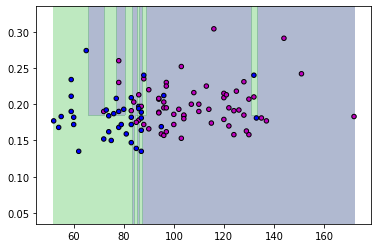

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def plot_boundaries(model, X, y):
    x_min, x_max = X.iloc[:, 0].min() - .1, X.iloc[:, 0].max() + .1
    y_min, y_max = X.iloc[:, 1].min() - .1, X.iloc[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))

    plt.figure()
#    print(xx.ravel())
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
#    print(Z)
    plt.contourf(xx, yy, Z == "B", [0, 0.5, 1], alpha=0.4)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolor='k')
#    plt.set_title(tt)

    plt.show()

plot_boundaries(knn, prCancer[["perimeter", "symmetry"]], prCancer["diagnosis_result"])

In [0]:
knn.predict([[1, 1]])

array(['B'], dtype=object)

In [0]:
sklearn.metrics.accuracy_score(data_test['diagnosis_result'], test_predict)

0.7666666666666667

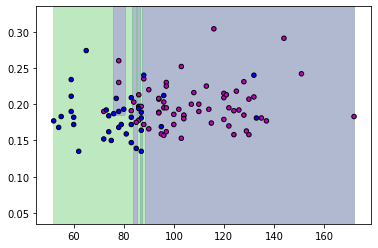

In [0]:
knn3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn3.fit(data_main[["perimeter", "symmetry"]], data_main["diagnosis_result"])
plot_boundaries(knn3, prCancer[["perimeter", "symmetry"]], prCancer["diagnosis_result"])

In [0]:
test_predict = knn3.predict(data_test[["perimeter", "symmetry"]])
sklearn.metrics.confusion_matrix(data_test['diagnosis_result'], test_predict)

array([[10,  6],
       [ 0, 14]])

In [0]:
sklearn.metrics.accuracy_score(data_test['diagnosis_result'], test_predict)

0.8

Пока мы смогли повторить все что было в R. Поговорим о нормализации.

In [0]:
Пока мы смогли повторить все что было в R. Поговорим о нормализации.

In [0]:
print(prCancer.perimeter.describe())
 

count    100.000000
mean      96.780000
std       23.676089
min       52.000000
25%       82.500000
50%       94.000000
75%      114.250000
max      172.000000
Name: perimeter, dtype: float64


In [0]:
print(prCancer.symmetry.describe())

count    100.000000
mean       0.193170
std        0.030785
min        0.135000
25%        0.172000
50%        0.190000
75%        0.209000
max        0.304000
Name: symmetry, dtype: float64


In [0]:
smin = min(prCancer.symmetry)
pmin = min(prCancer.perimeter)
smax = max(prCancer.symmetry)
pmax = max(prCancer.perimeter)
prCancer.symmetry = (prCancer.symmetry - smin)/(smax-smin)
prCancer.perimeter = (prCancer.perimeter - pmin)/(pmax-pmin)

In [0]:
pc_test = prCancer.iloc[pc_test_ind]
pc_main = prCancer.iloc[[x for x in range(len(prCancer)) if not x in pc_test_ind]]
data_main = pc_main[["diagnosis_result", "perimeter", "symmetry"]]
data_test = pc_test[["diagnosis_result", "perimeter", "symmetry"]]

/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


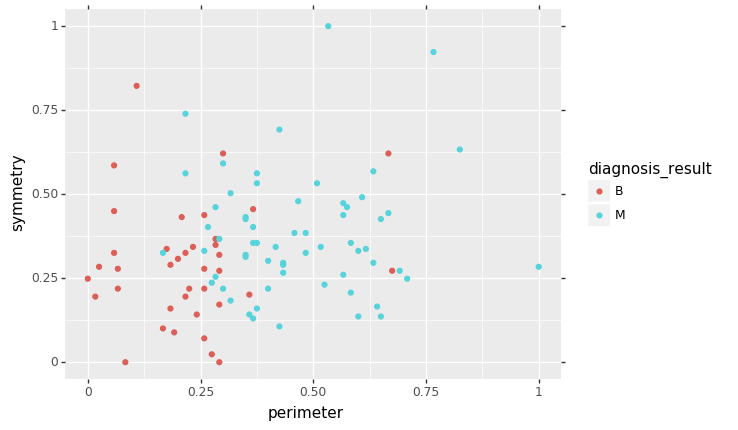

<ggplot: (-9223363306437450801)>

In [0]:
ggplot(prCancer) + aes(color = 'diagnosis_result') + geom_point(aes(x='perimeter', y = 'symmetry'))

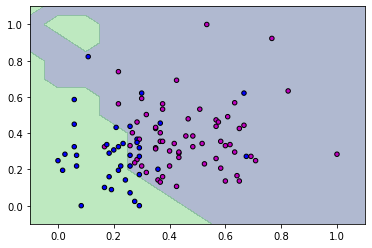

In [0]:
knn3_norm = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn3_norm.fit(data_main[["perimeter", "symmetry"]], data_main["diagnosis_result"])
plot_boundaries(knn3_norm, prCancer[["perimeter", "symmetry"]], prCancer["diagnosis_result"])

In [0]:
knn3_norm.predict([[0,0], [1, 1]])

array(['B', 'M'], dtype=object)

In [0]:
test_predict = knn3_norm.predict(data_test[["perimeter", "symmetry"]])
sklearn.metrics.confusion_matrix(data_test['diagnosis_result'], test_predict)
sklearn.metrics.accuracy_score(data_test['diagnosis_result'], test_predict)

0.7666666666666667